In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from flask import Flask

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper (ORM)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
# Set up SQLite database connection
engine = create_engine("sqlite:///hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
inspector_gadget = inspect(engine)
tables = inspector_gadget.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector_gadget.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

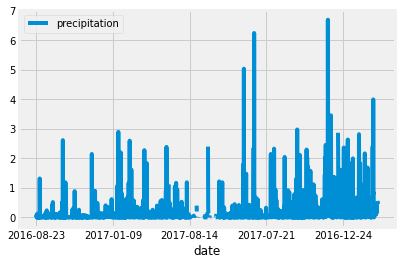

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database, calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = []
# Perform a query to retrieve the data and precipitation scores and filter out date older than 1 year
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
precip_df.set_index(precip_df['date'], inplace=True)
precip_df.sort_index()

# print(precip_df.to_string(index=False))
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()

In [11]:
precip_df.head(10)

,date,precipitation
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
2016-08-28,2016-08-28,0.01
2016-08-29,2016-08-29,0.00
2016-08-30,2016-08-30,0.00
2016-08-31,2016-08-31,0.13


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [14]:
# What are the most active stations? Use a func.count on stations and group them by station, then order desc
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.prcp).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(1.79,), (2.15,), (0.06,), (0.01,), (0.12,), (0.6,), (0.35,), (0.0,), (0.24,), (0.02,), (0.01,), (0.12,), (0.14,), (0.03,), (0.11,), (0.16,), (0.07,), (0.16,), (0.09,), (0.3,), (0.31,), (0.34,), (2.33,), (0.83,), (0.06,), (0.36,), (0.07,), (0.01,), (0.22,), (0.07,), (0.34,), (0.94,), (0.01,), (0.03,), (0.17,), (0.17,), (0.0,), (0.59,), (0.25,), (0.14,), (0.06,), (0.16,), (0.03,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.28,), (0.03,), (0.0,), (0.0,), (0.04,), (0.0,), (0.01,), (0.02,), (0.11,), (0.0,), (0.0,), (0.15,), (0.02,), (0.08,), (0.11,), (0.01,), (0.22,), (0.05,), (0.1,), (0.16,), (0.07,), (0.1,), (0.0,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.21,), (0.11,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.24,), (0.01,), (0.0,), (0.11,), (0.39,), (0.11,), (2.05,), (0.25,), (0.3,), (0.08,), (0.06,), (0.17,), (0.0,), (0.09,), (0.05,), (0.37,), (0.35,), (0.77,), (0.04,), (0.22,), (0.0,), (0.12,), (0.07,), (0.31,), (0.02,), (0.0,), (0.0,), (0.04,), (0.92,), (0.14

In [20]:
# put temp measurements of USC00519281 into df
df = pd.DataFrame(results, columns=['prcp'])
print(df)

     prcp
0    1.79
1    2.15
2    0.06
3    0.01
4    0.12
..    ...
347  0.00
348  0.32
349  0.12
350  0.01
351  0.06

[352 rows x 1 columns]


Text(0, 0.5, '# of Occurences')

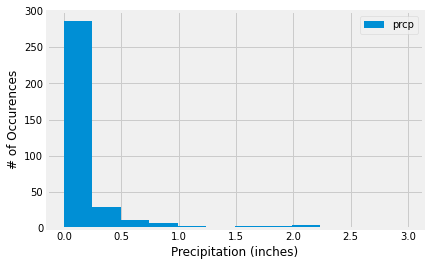

In [21]:
# plot histogram with bins to group data
df.plot.hist(bins=12)
plt.tight_layout
plt.xlabel("Precipitation (inches)")
plt.ylabel('# of Occurences')

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps():
    

In [ ]:
# set up Flask and create root route
app = Flask(__name__)

@app.route('/')

def welcome():
    return(
    """Welcome to the Hawaii Climate Analysis API!<br/>
    """
    f"-------------------------------------------<br/>"
    f"Available Routes:<br/>"
    f"/api/v1.0/precipitation<br/>"
    f"/api/v1.0/stations<br/>"
    f"/api/v1.0/tobs<br/>"
    f"/api/v1.0/temp/start/end<br/>"
    )

@app.route('/api/v1.0/precipitation')

# get precipitation data, jsonify it to display on webpage
def precipitation():
    prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
    precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= prev_year).all()
    precip = {date: prcp for date,prcp in precipitation}
    return


# if __name__ == '__main__':
#     app.run(debug=True)

# Challenge